# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

In [1]:
import textwrap

business_objective = "We aim to develop an AI model for estimating the price of used cars based on various features such as age, mileage, brand, model, and other relevant features. This involves collecting and preprocessing data, selecting or filtering important features, and applying ML algorithms to them and evaluate and compare their accuracy. The overall goal is to uncover patterns and relationships within the data that influence car prices, enabling more informed pricing strategies and decision-making."

wrapped_text = textwrap.fill(business_objective, width=100)

print(wrapped_text)

We aim to develop an AI model for estimating the price of used cars based on various features such
as age, mileage, brand, model, and other relevant features. This involves collecting and
preprocessing data, selecting or filtering important features, and applying ML algorithms to them
and evaluate and compare their accuracy. The overall goal is to uncover patterns and relationships
within the data that influence car prices, enabling more informed pricing strategies and decision-
making.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Print first few rows of the dataset

In [3]:
df = pd.read_csv('vehicles.csv')

In [4]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  

##### Note: We can observe several NaN values in the first few rows of the data. These will be dealt with later

#### What do the columns of the dataset represent?

In [5]:
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-n

##### While columns like odometer reading, condition, manufacturer, and drive are highly relevant for the price of used cars, other columns such as VIN, id, and region do not typically affect the price as much. It is important to filter out these columns as part of the data clean up and pre-processing stage

#### Print statistics of the dataset features

In [6]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


#### Check for potential data quality issues

In [7]:
# Missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [8]:
# What is the percentage of missing values for each feature?
df.isna().sum()/df.shape[0]*100

,0
id,0.000000
region,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
condition,40.785232
cylinders,41.622470
fuel,0.705819
odometer,1.030735


##### Note: From the above, we see that there are a lot of missing values in the dataset. For some features, a large percentage of the values are missing and hence, it may not make sense to include them as inputs to our regression models.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

#### Drop columns that do not look relevant to the task

In [9]:
# Drop irrelevant columns
irrelevant_columns = ['id', 'VIN', 'model','region']
df.drop(columns=irrelevant_columns, inplace=True)

#### Remove rows where the value of the target, i.e., car price is too low or too high.

In [10]:
# Drop rows where the price column is less than 1000 or more than 100K
df = df[df['price'] > 1000]
df = df[df['price'] < 100000]

#### Remove columns with a high percentage of missing values

In [11]:
threshold = 0.5  # Set threshold for missing values (50%)
df = df[df.columns[df.isnull().mean() < threshold]]

#### Handle remaining missing values

In [12]:
# For categorical columns, we fill missing values with the mode of the feature

categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

<ipython-input-12-05a7bca30030>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [13]:
# For numerical columns, we fill the missing values with the median of the feature

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)

<ipython-input-13-68838cd0017a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


#### Remove outliers

In [14]:
# We use the IQR method for removing outliers

# Ref: https://stackoverflow.com/a/50461938

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for numerical columns
for column in numerical_columns:
    df = remove_outliers(df, column)



#### What does the cleaned up data look like?

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 353953 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         353953 non-null  int64  
 1   year          353953 non-null  float64
 2   manufacturer  353953 non-null  object 
 3   condition     353953 non-null  object 
 4   cylinders     353953 non-null  object 
 5   fuel          353953 non-null  object 
 6   odometer      353953 non-null  float64
 7   title_status  353953 non-null  object 
 8   transmission  353953 non-null  object 
 9   drive         353953 non-null  object 
 10  type          353953 non-null  object 
 11  paint_color   353953 non-null  object 
 12  state         353953 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 37.8+ MB
None


In [16]:
df.describe()

,price,year,odometer
count,353953.000000,353953.000000,353953.000000
mean,18701.446782,2012.417640,92786.107808
std,12562.867409,5.447185,60684.082533
min,1002.000000,1995.000000,0.000000
25%,7995.000000,2009.000000,39763.000000
50%,15991.000000,2013.000000,88506.000000
75%,27590.000000,2017.000000,135849.000000
max,57982.000000,2022.000000,282407.000000


#### Check that there are no more missing values

In [17]:
df.isna().sum()/df.shape[0]*100

,0
price,0.0
year,0.0
manufacturer,0.0
condition,0.0
cylinders,0.0
fuel,0.0
odometer,0.0
title_status,0.0
transmission,0.0
drive,0.0


#### Save cleaned up data to a new file

In [18]:
df.to_csv('cleaned_vehicles.csv', index=False)

#### Visualize correlations with target variable (price)

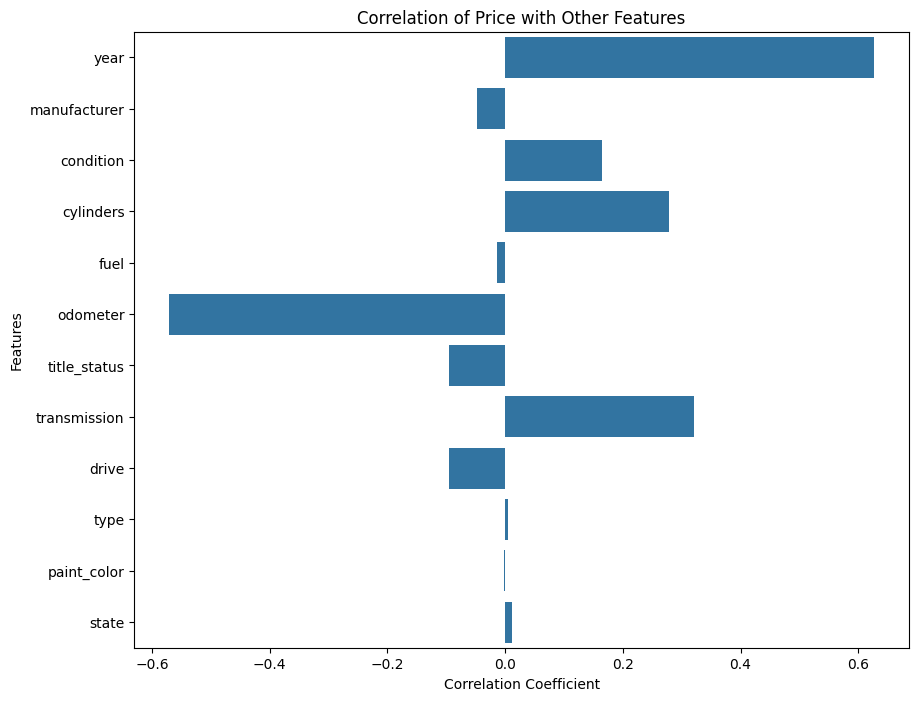

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


df_copy = df
# Label encode categorical columns
label_encoders = {}
for col in df_copy.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col])
    label_encoders[col] = le

# Calculate correlation of price with other features
price_correlation = df_copy.corr()['price'].drop('price')

# Plot the correlation of price with other features
plt.figure(figsize=(10, 8))
sns.barplot(x=price_correlation.values, y=price_correlation.index)
plt.title('Correlation of Price with Other Features')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

##### COMMENT: From the above plot, we see that the price of a used car has high correlation with the year, odometer reading, condition, transmission and cylinders. The correlations are weaker for the other features in the processed dataset.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### Load the dataset

In [20]:
df = pd.read_csv('cleaned_vehicles.csv')

#### Separate input features and target variable

In [21]:
X = df.drop(columns=['price'])
y = df['price']

#### Data preprocessing

In [22]:
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

In [23]:
# We use standard scaler preprocessing for numerical features, and OneHotEncoding for categorical features

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

#### Basic Linear regression

In [24]:
models = {'Linear Regression': LinearRegression()}

#### Train test split

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model training and evaluation

Linear Regression - Train RMSE: 6506.830994757792
Linear Regression - Train Mean Absolute Error: 4798.042138282492
Linear Regression - Train R^2 Score: 0.7312968730716248
Linear Regression - Test RMSE: 6545.114755233603
Linear Regression - Test Mean Absolute Error: 4818.290540432155
Linear Regression - Test R^2 Score: 0.7303264487509924


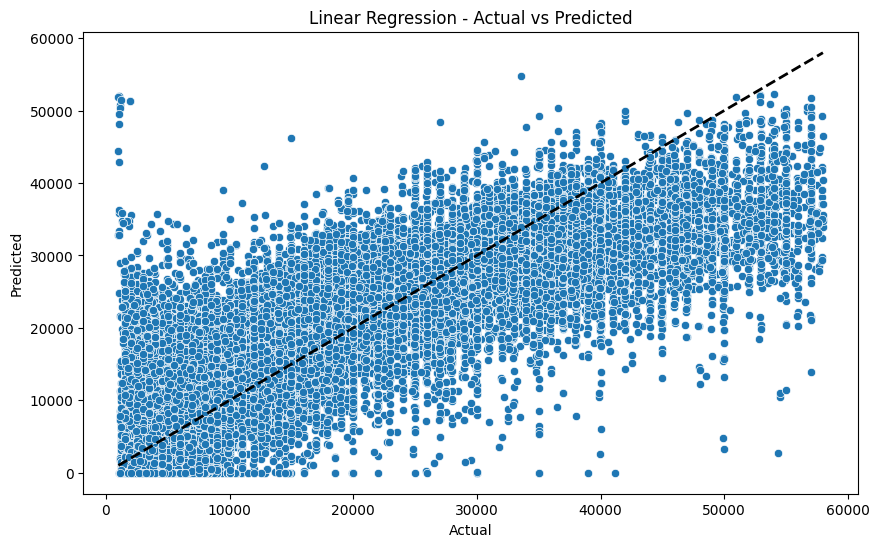

In [28]:
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)

    # Ensure no negative predictions for train set
    y_train_pred = np.maximum(y_train_pred, 0)

    # Calculate accuracy metrics for training data
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)

    print(f"{model_name} - Train RMSE: {train_rmse}")
    print(f"{model_name} - Train Mean Absolute Error: {train_mae}")
    print(f"{model_name} - Train R^2 Score: {train_r2}")


    # make predictions on test data
    y_pred = pipeline.predict(X_test)

    # Ensure no negative predictions
    y_pred = np.maximum(y_pred, 0)


    # Calculate accuracy metrics for test data
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"{model_name} - Test RMSE: {rmse}")
    print(f"{model_name} - Test Mean Absolute Error: {mae}")
    print(f"{model_name} - Test R^2 Score: {r2}")

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

##### Some insights:

*   The linear regression model gets us to a RMSE of **\$6545** for the price prediction, with an R2 score of **0.73**
*   The basic model can predict the price of used cars with an error which would typically be in the range of a few thousand dollars. While this can be a good starting point, it would definitely not be ideal for a car dealership using our model for their pricing strategy and marketing decisions.
* We would like to improve the basic linear regression. In the next step, we try a few different regression models to see if we can improve over the initial result.italicized text



#### Compare different regression models: Linear, Ridge, Lasso and Decision Tree regression

In [29]:
# Define different regression models to try
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
}

Linear Regression - Train RMSE: 6506.830994757792
Linear Regression - Train Mean Absolute Error: 4798.042138282492
Linear Regression - Train R^2 Score: 0.7312968730716248
Linear Regression - Test RMSE: 6545.114755233603
Linear Regression - Test Mean Absolute Error: 4818.290540432155
Linear Regression - Test R^2 Score: 0.7303264487509924


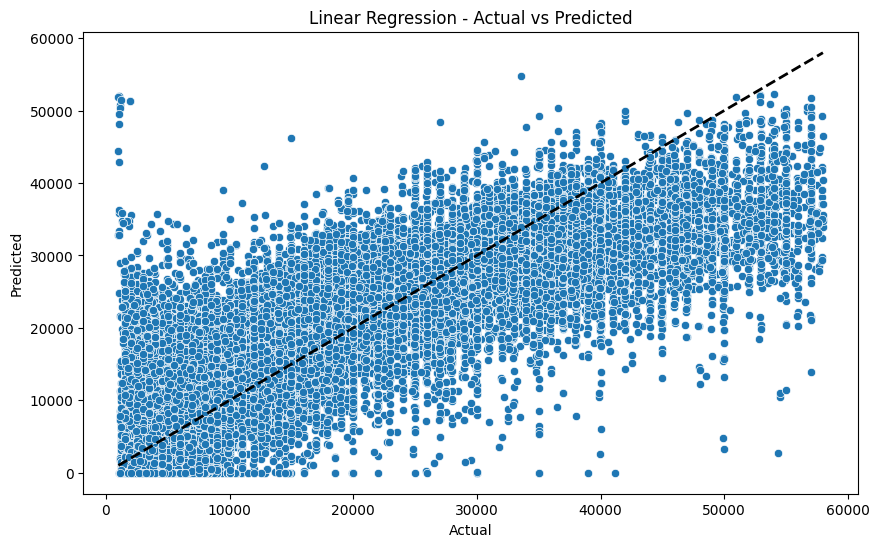

Ridge Regression - Train RMSE: 6507.720947074195
Ridge Regression - Train Mean Absolute Error: 4798.22981890381
Ridge Regression - Train R^2 Score: 0.731223365914677
Ridge Regression - Test RMSE: 6544.499898310223
Ridge Regression - Test Mean Absolute Error: 4818.076805856713
Ridge Regression - Test R^2 Score: 0.7303771133666639


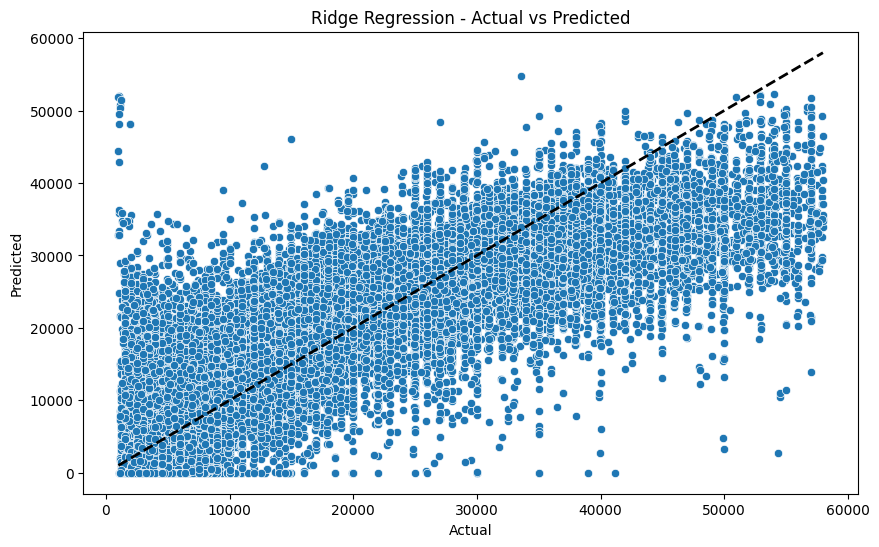

Lasso Regression - Train RMSE: 6511.474131539677
Lasso Regression - Train Mean Absolute Error: 4799.301971854123
Lasso Regression - Train R^2 Score: 0.7309132545290272
Lasso Regression - Test RMSE: 6548.790074003422
Lasso Regression - Test Mean Absolute Error: 4820.099453396936
Lasso Regression - Test R^2 Score: 0.7300235008024405


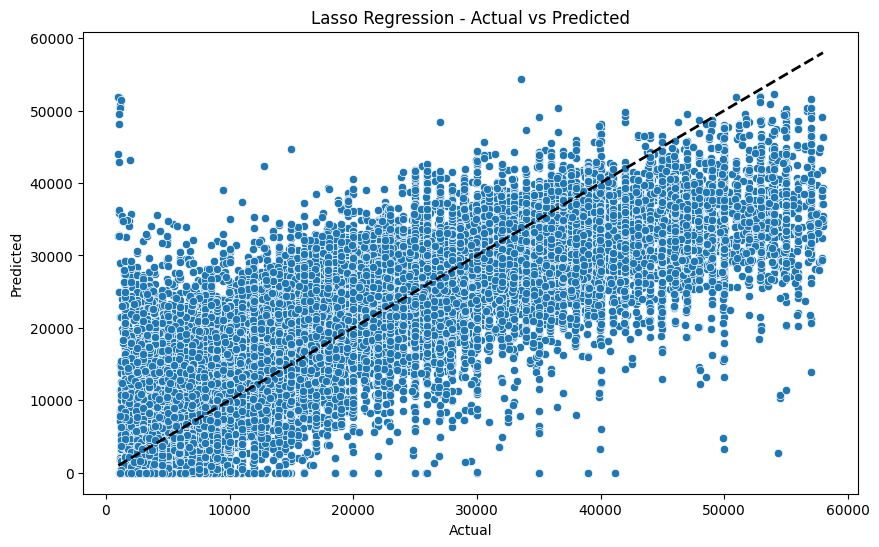

Decision Tree - Train RMSE: 236.73863431486566
Decision Tree - Train Mean Absolute Error: 21.741015442510797
Decision Tree - Train R^2 Score: 0.9996443097646217
Decision Tree - Test RMSE: 4682.240662487262
Decision Tree - Test Mean Absolute Error: 2076.7532899377957
Decision Tree - Test R^2 Score: 0.8619897673750264


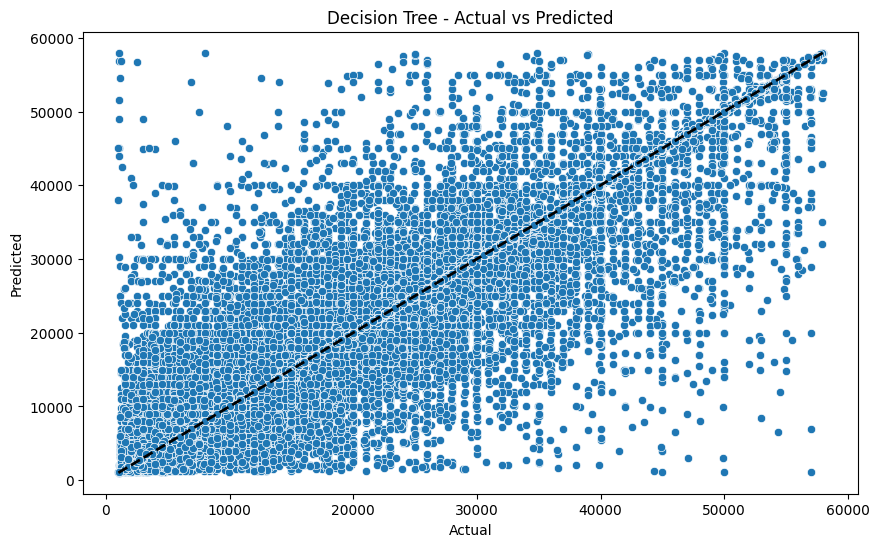

In [30]:
# Train and evaluate each model
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)

    # Ensure no negative predictions for train set
    y_train_pred = np.maximum(y_train_pred, 0)

    # Calculate accuracy metrics for training data
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)

    print(f"{model_name} - Train RMSE: {train_rmse}")
    print(f"{model_name} - Train Mean Absolute Error: {train_mae}")
    print(f"{model_name} - Train R^2 Score: {train_r2}")

    # make predictions on test set
    y_pred = pipeline.predict(X_test)

    # Ensure no negative predictions
    y_pred = np.maximum(y_pred, 0)

    # Calculate accuracy metrics for test data
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"{model_name} - Test RMSE: {rmse}")
    print(f"{model_name} - Test Mean Absolute Error: {mae}")
    print(f"{model_name} - Test R^2 Score: {r2}")

    # Plotting actual vs predicted values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.show()

##### From the above result, we see that the Lasso and Ridge regression models do not improve over Linear regression. However, using a Decision Tree (DT) based regression model leads to a significant improvement. The R2 score jumps to **0.86** and the test RMSE goes down to **\$4682**

#### Add polynomial features

In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('poly', PolynomialFeatures(degree=3, include_bias=False)),
            ('scaler', StandardScaler())
        ]), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree - Train RMSE: 236.73863431486566
Decision Tree - Train Mean Absolute Error: 21.741015442510797
Decision Tree - Train R^2 Score: 0.9996443097646217
Decision Tree - Test RMSE: 4644.175482500519
Decision Tree - Test Mean Absolute Error: 2057.22995719275
Decision Tree - Test R^2 Score: 0.8642246077092091


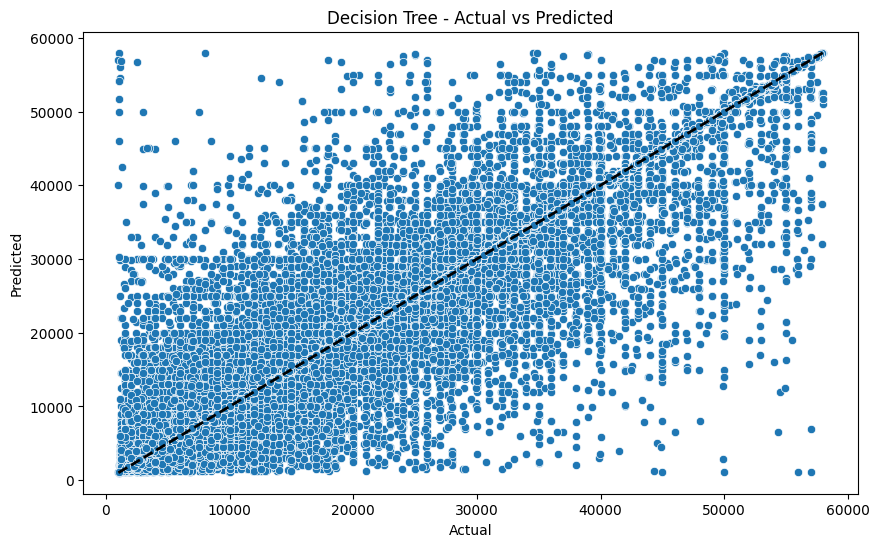

In [35]:
model_name = 'Decision Tree'
model = DecisionTreeRegressor()

# Train and evaluate model
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)

# Ensure no negative predictions for train set
y_train_pred = np.maximum(y_train_pred, 0)

# Calculate accuracy metrics for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

print(f"{model_name} - Train RMSE: {train_rmse}")
print(f"{model_name} - Train Mean Absolute Error: {train_mae}")
print(f"{model_name} - Train R^2 Score: {train_r2}")

# make predictions on test set
y_pred = pipeline.predict(X_test)

# Ensure no negative predictions
y_pred = np.maximum(y_pred, 0)

# Calculate accuracy metrics for test data
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"{model_name} - Test RMSE: {rmse}")
print(f"{model_name} - Test Mean Absolute Error: {mae}")
print(f"{model_name} - Test R^2 Score: {r2}")

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'{model_name} - Actual vs Predicted')
plt.show()

##### The use of polynomial features with order of 3 leads to a slight improvement in the RMSE and R2 score of the Decision Tree regression model.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.